In [1]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv('DeathGripsDataset.csv')
# df = pd.read_csv("Alan2.csv")
df.head()
df = df.fillna(0)

In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        88 non-null     int64  
 1   Labels            88 non-null     int64  
 2   names             88 non-null     object 
 3   albums            88 non-null     object 
 4   danceability      88 non-null     float64
 5   energy            88 non-null     float64
 6   key               88 non-null     int64  
 7   loudness          88 non-null     float64
 8   mode              88 non-null     int64  
 9   speechiness       88 non-null     float64
 10  acousticness      88 non-null     float64
 11  instrumentalness  88 non-null     float64
 12  valence           88 non-null     float64
 13  tempo             88 non-null     float64
 14  types             88 non-null     object 
 15  duration_ms       88 non-null     int64  
 16  time_signature    88 non-null     int64  
dtyp

Unnamed: 0          0
Labels              0
names               0
albums              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
valence             0
tempo               0
types               0
duration_ms         0
time_signature      0
dtype: int64

In [5]:
yescols = ["danceability", "key",
       "loudness", "mode", "speechiness", "acousticness", "instrumentalness",
       "valence", "tempo"]
# yescols = ["dbn_nez","dbe_nez","dbz_nez","SZA"]
nocols = ['names','albums', "energy", 'types', 'duration_ms', 'time_signature']
X = df[yescols]
y = df.Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [6]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [7]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [8]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[21  0]
 [ 6  0]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       0.00      0.00      0.00         6

    accuracy                           0.78        27
   macro avg       0.39      0.50      0.44        27
weighted avg       0.60      0.78      0.68        27



=== All AUC Scores ===
[0.42857143 0.64285714 0.28571429 0.21428571 0.5        0.75
 0.625      0.75       0.5        0.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.46964285714285714


/opt/anaconda3/envs/name_of_my_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/name_of_my_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/name_of_my_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [9]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['sqrt', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(3, 10)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=2, n_jobs = -1, return_train_score=True)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 1800, 'max_features': 'sqrt', 'max_depth': 4}


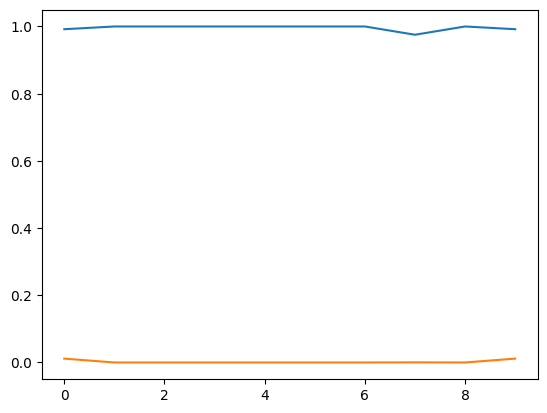

In [10]:
plt.plot(rfc_random.cv_results_['mean_train_score'])
plt.plot(rfc_random.cv_results_['std_train_score'])

In [11]:
# print(rfc_random.cv_results_)
mean_fit_time = rfc_random.cv_results_['mean_fit_time']
mean_score_time = rfc_random.cv_results_['mean_score_time']
std_score_time = rfc_random.cv_results_['std_score_time']
param_n_estimators = rfc_random.cv_results_['param_n_estimators']
param_max_features = rfc_random.cv_results_['param_max_features']
param_max_depth = rfc_random.cv_results_['param_max_depth']
params = rfc_random.cv_results_['params']
split0_test_score = rfc_random.cv_results_['split0_test_score']
split1_test_score = rfc_random.cv_results_['split1_test_score']
split2_test_score = rfc_random.cv_results_['split2_test_score']
mean_test_score = rfc_random.cv_results_['mean_test_score']
std_test_score = rfc_random.cv_results_['std_test_score']
rank_test_score = rfc_random.cv_results_['rank_test_score']

# ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'param_max_features', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']
# 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']

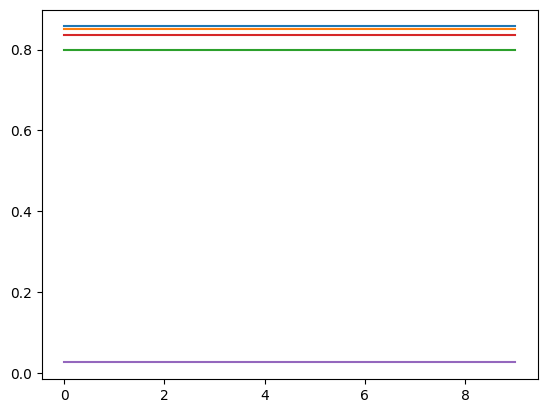

In [12]:
plt.plot(split0_test_score)
plt.plot(split1_test_score)
plt.plot(split2_test_score)
plt.plot(mean_test_score)
plt.plot(std_test_score)
# plt.plot(rank_test_score)

=== Confusion Matrix ===
[[21  0]
 [ 6  0]]


=== Classification Report ===
                   0    1  accuracy  macro avg  weighted avg
precision   0.777778  0.0  0.777778   0.388889      0.604938
recall      1.000000  0.0  0.777778   0.500000      0.777778
f1-score    0.875000  0.0  0.777778   0.437500      0.680556
support    21.000000  6.0  0.777778  27.000000     27.000000


=== All AUC Scores ===
[0.35714286 0.71428571 0.28571429 0.14285714 0.5        0.75
 0.625      0.625      0.42857143 0.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.4428571428571429


/opt/anaconda3/envs/name_of_my_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/name_of_my_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/name_of_my_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

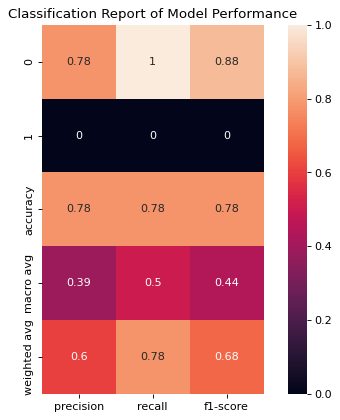

In [13]:
# rfc_random.best_params_['max_depth']
rfc = RandomForestClassifier(n_estimators=rfc_random.best_params_['n_estimators'], max_depth=rfc_random.best_params_['max_depth'], max_features=rfc_random.best_params_['max_features'])
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
# a = sns.heatmap(confusion_matrix(y_test, rfc_predict), annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0)
print('\n')
print("=== Classification Report ===")
report = pd.DataFrame(classification_report(y_test, rfc_predict, output_dict=True))
print(report)
# a = sns.heatmap(classification_report(y_test, rfc_predict), annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0)
xl = np.array(["precision", "recall", "f1-score"])
a = metrics.classification_report(y_test,rfc_predict)
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)
sns.heatmap(report[:3].T, annot=True)
ax.set_title("Classification Report of Model Performance")

# r.set_ylabel("Classes")
# r.set_xlabel("Precision")
# sns.heatmap(pd.DataFrame(classification_report(y_test, rfc_predict)).iloc[:-1, :].T, annot=True)
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

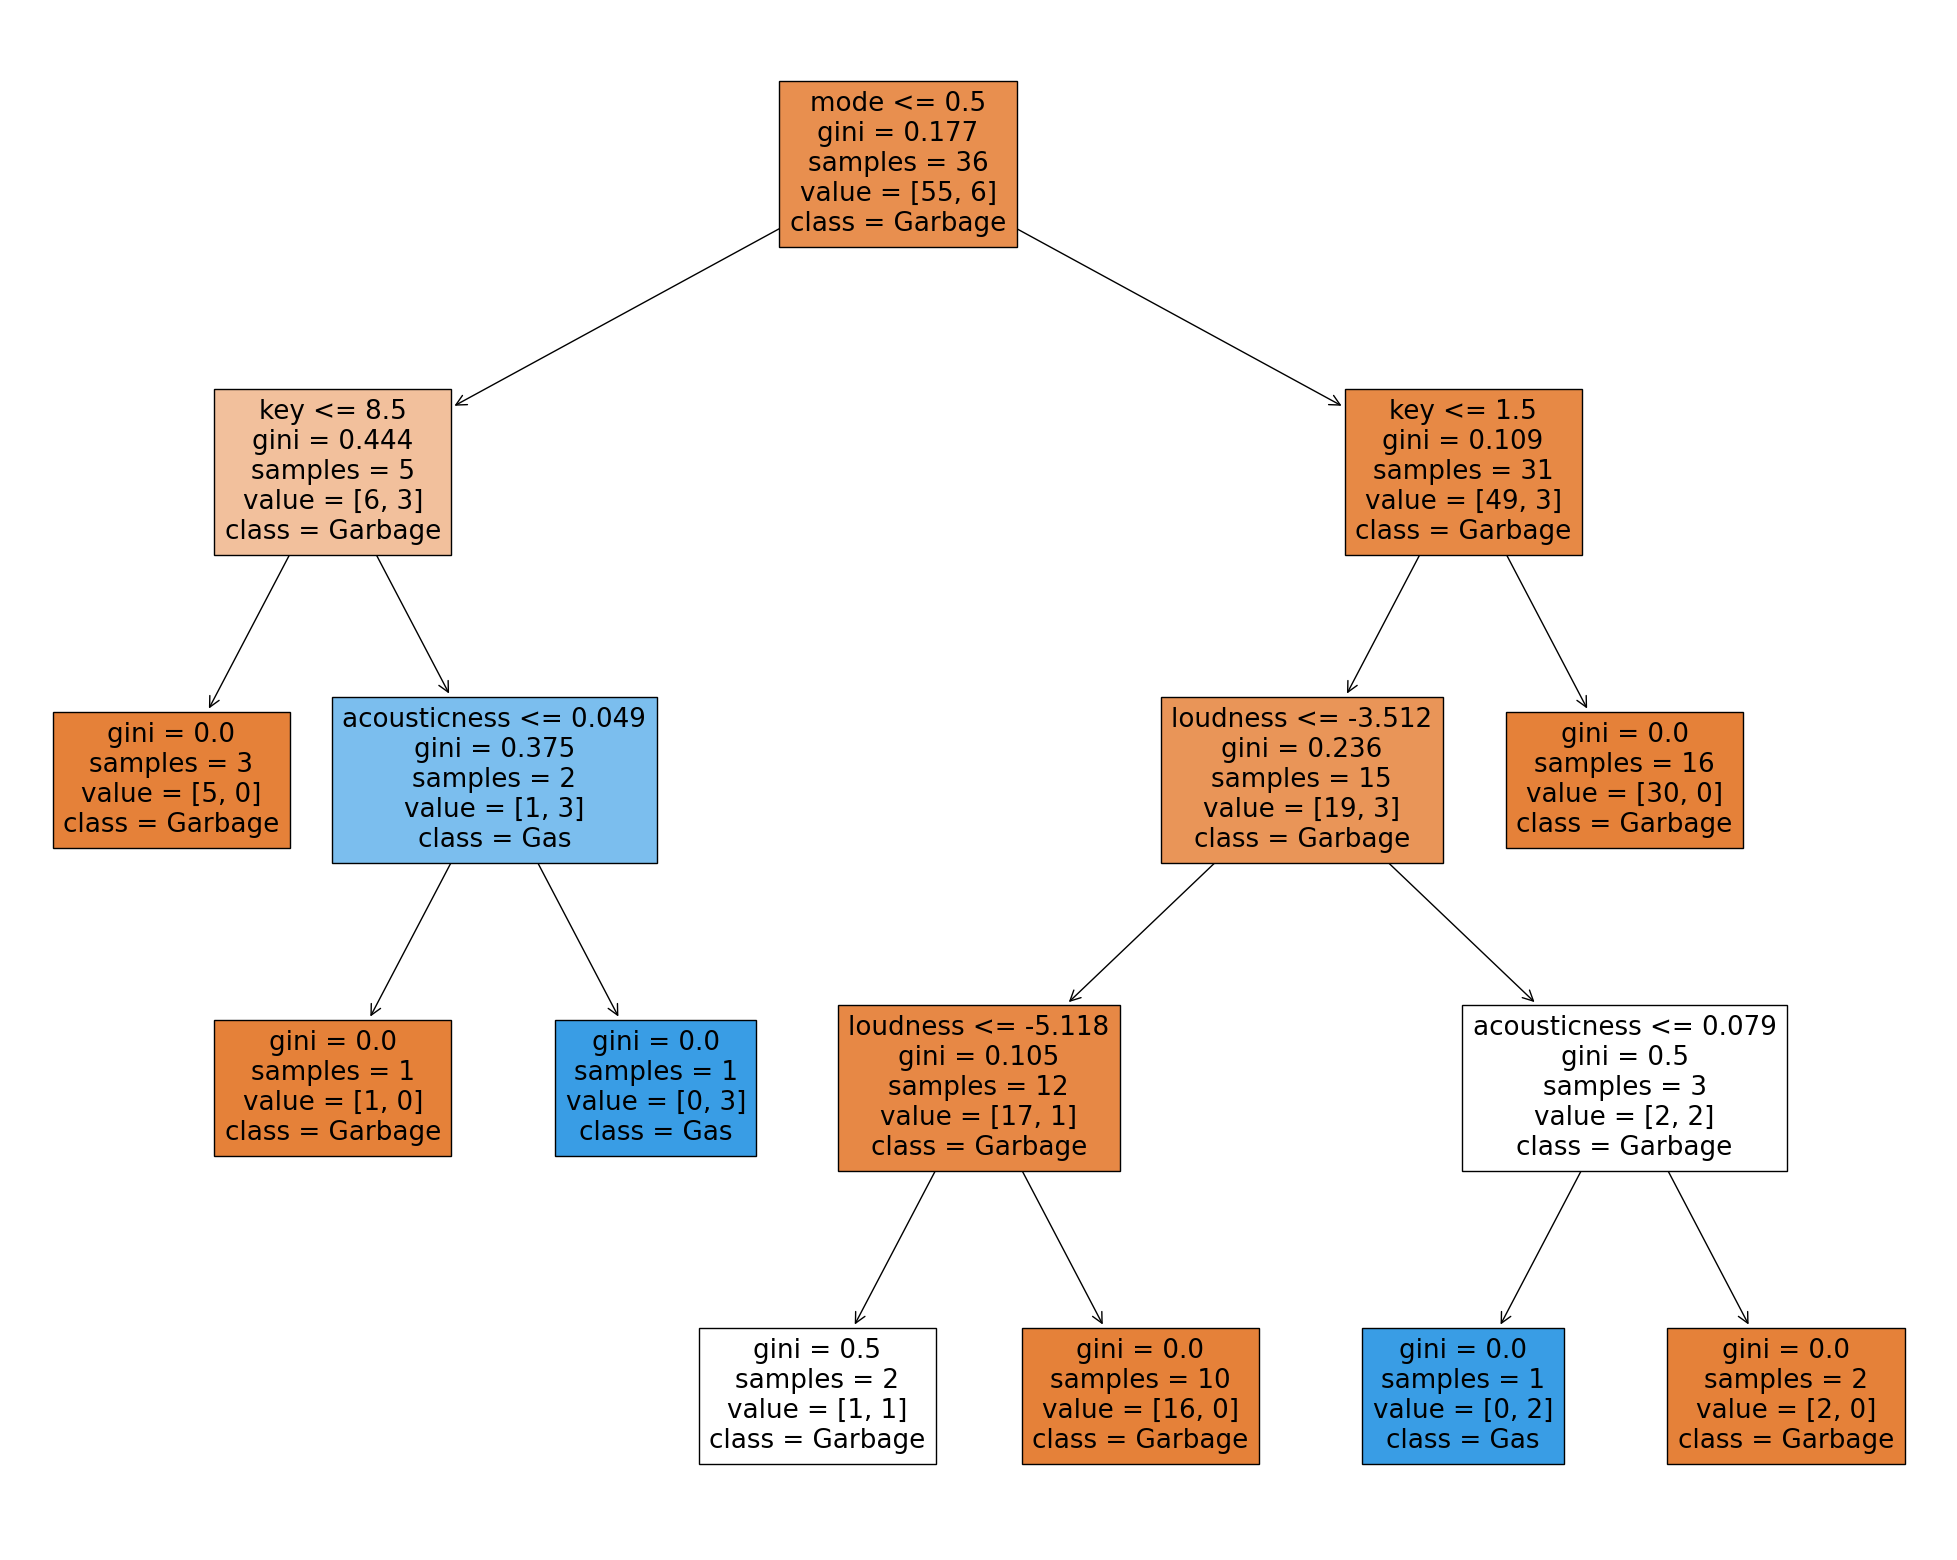

In [14]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rfc.estimators_[0], 
                feature_names=yescols,  
                class_names=["Garbage","Gas"],
                filled=True)

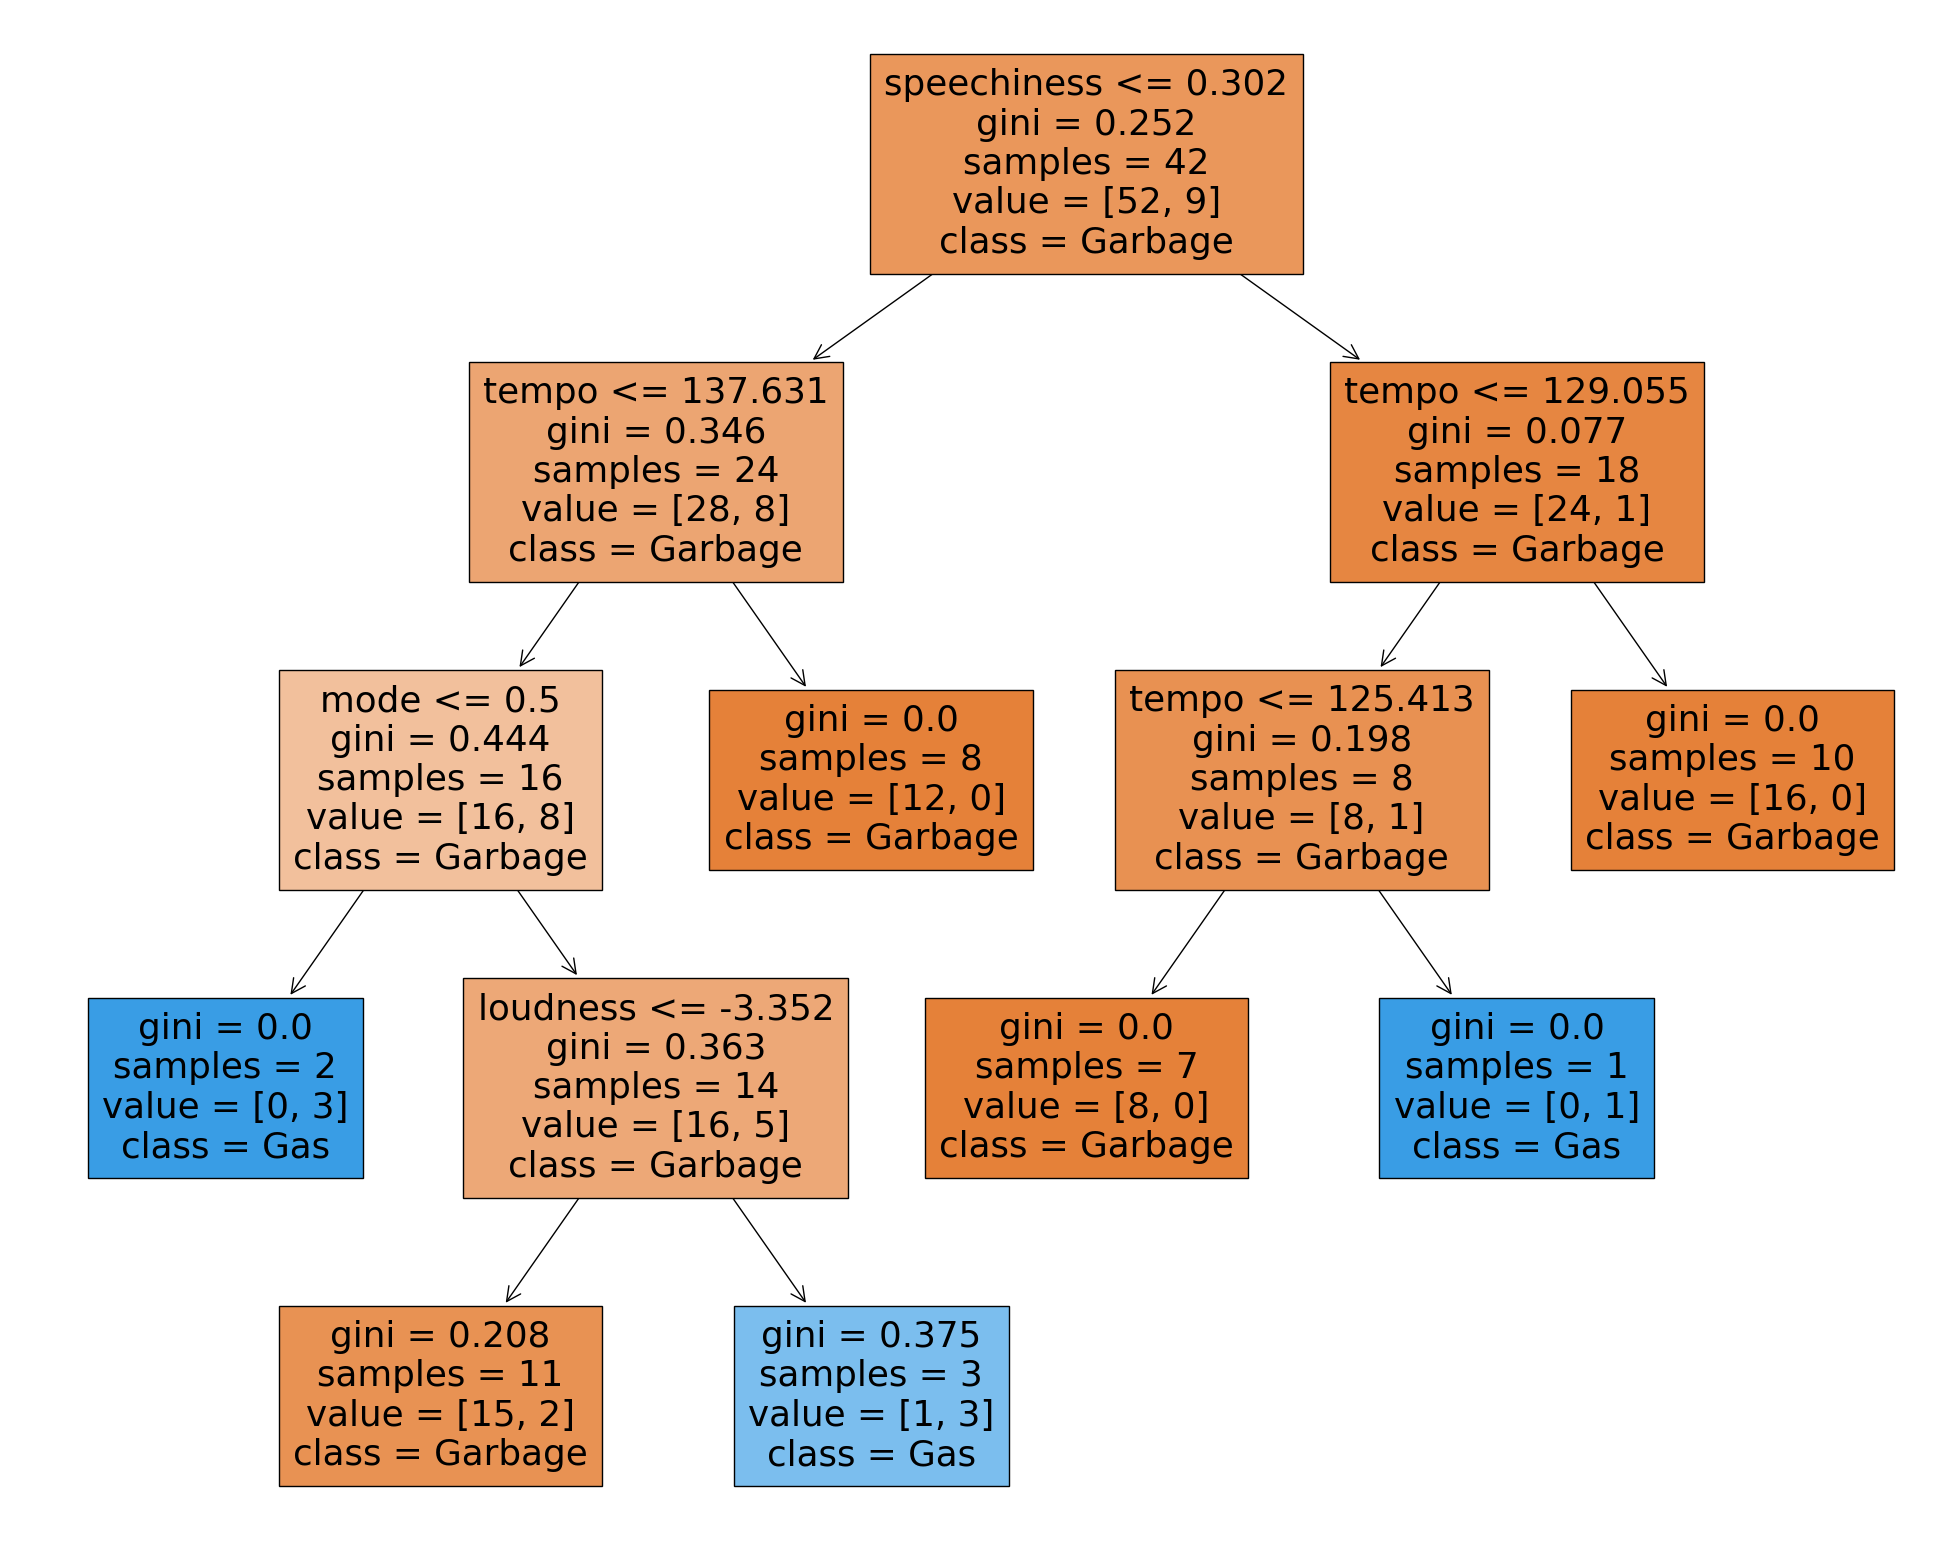

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rfc.estimators_[10], 
                feature_names=yescols,  
                class_names=["Garbage","Gas"],
                filled=True)

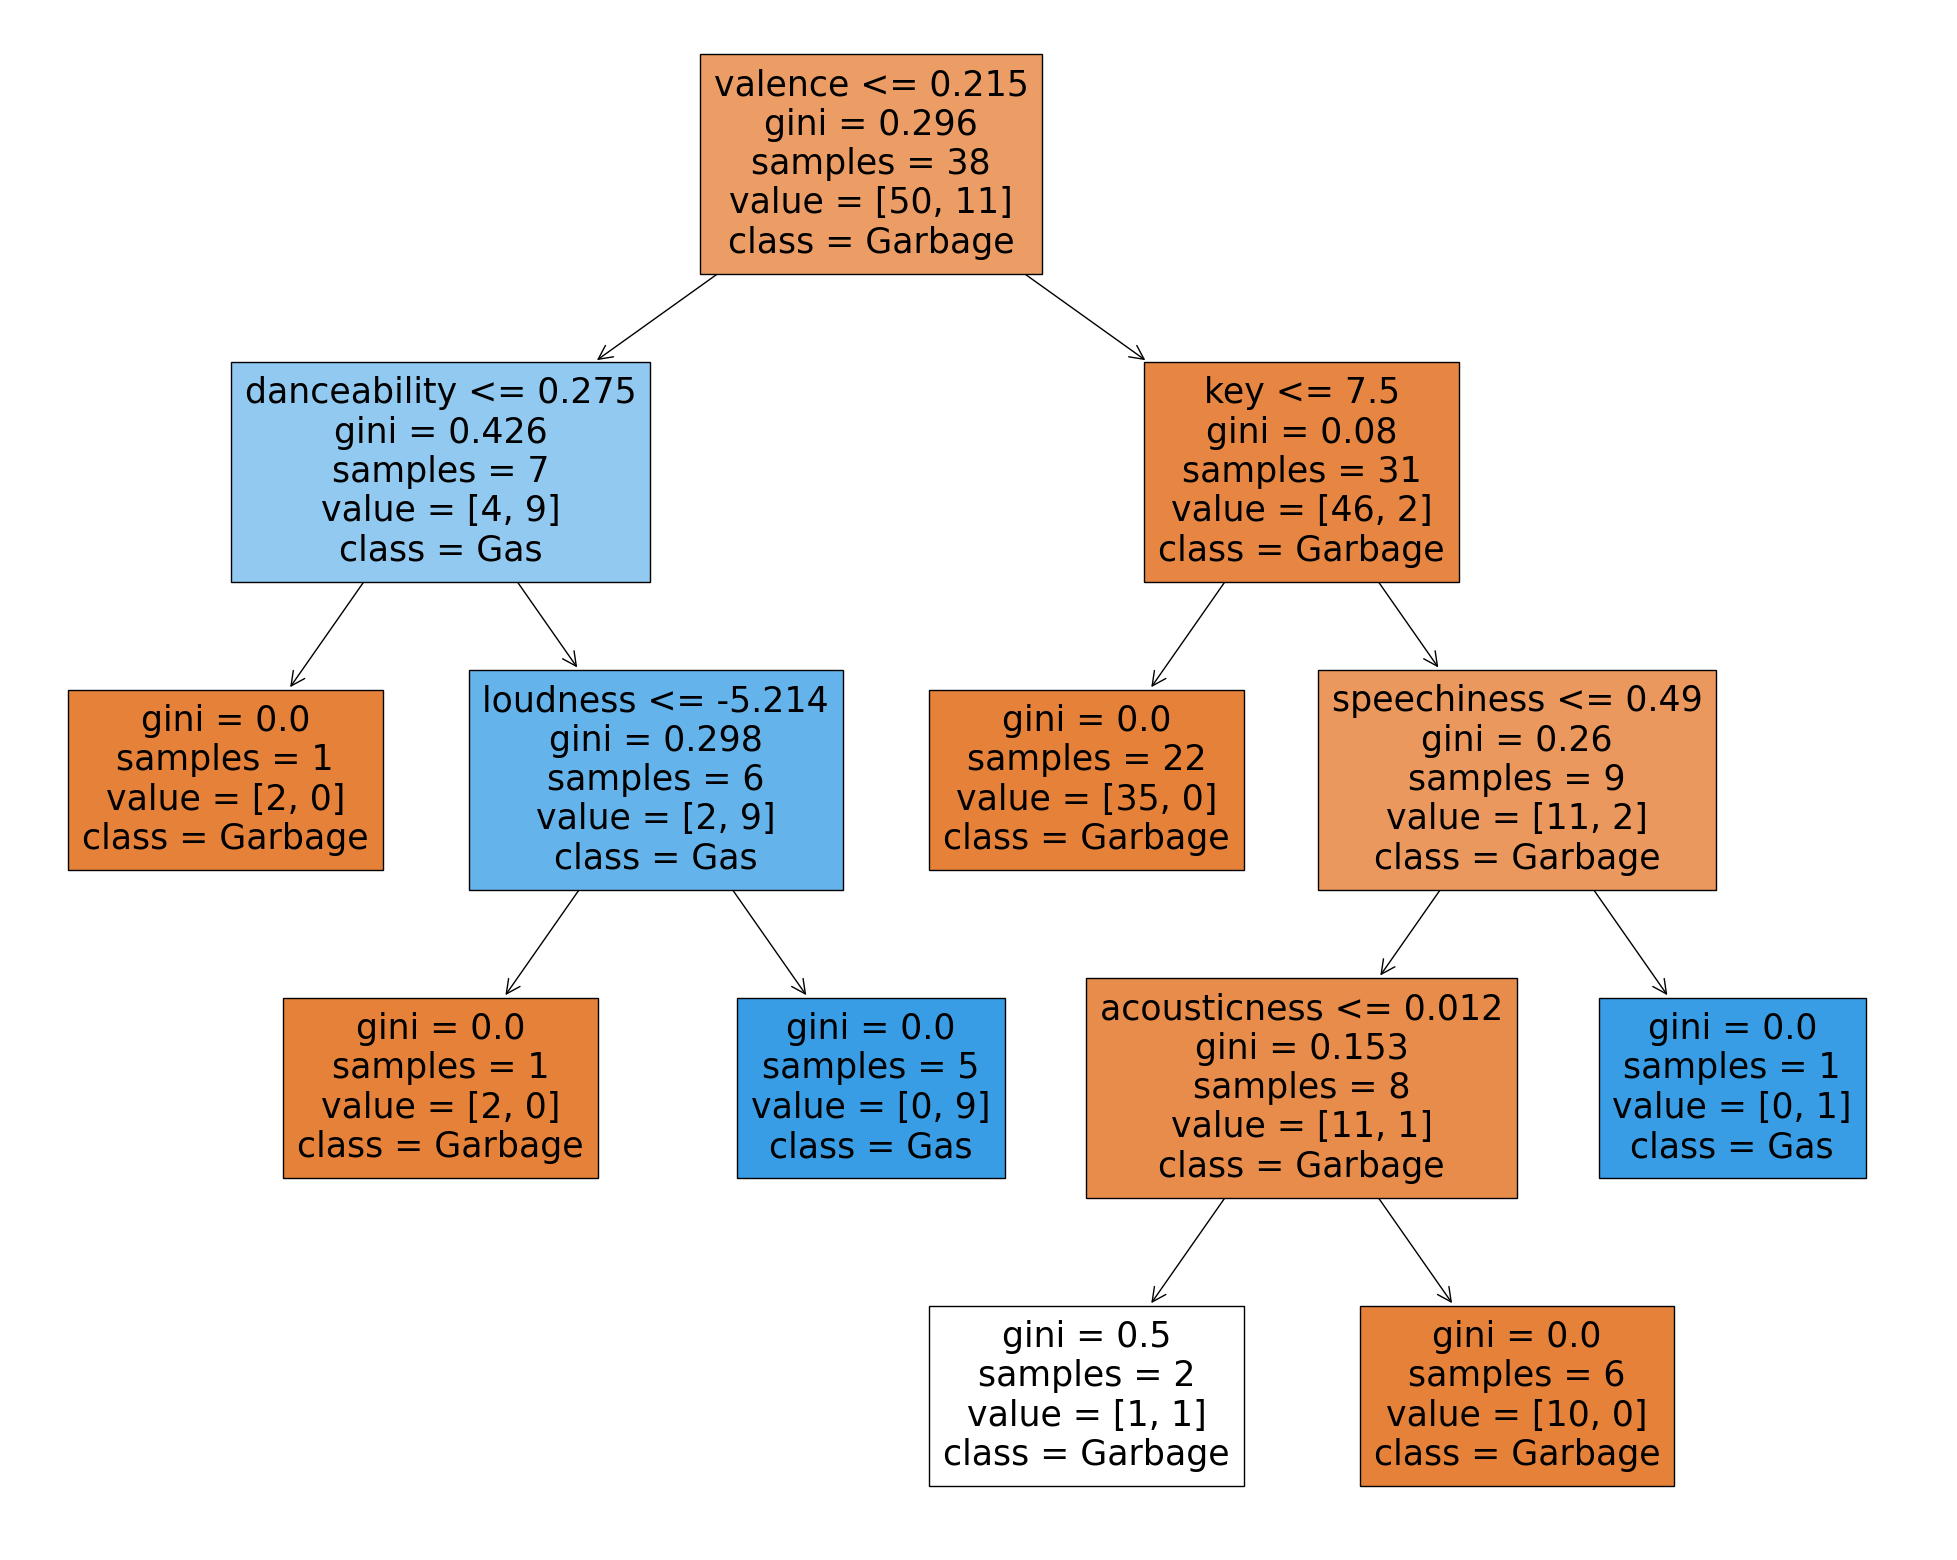

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rfc.estimators_[100], 
                feature_names=yescols,  
                class_names=["Garbage","Gas"],
                filled=True)

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Metrics: 
Accuracy: 0.6666666666666666
AUC: 0.6666666666666666
Precision:  0.3333333333333333
AUC:  0.927142857142857
F1-Score:  0.6
Recall:  0.5


Text(0.5, 1.0, "DecisionTreeClassifier(criterion='entropy', max_depth=3) Confusion Matrix:")

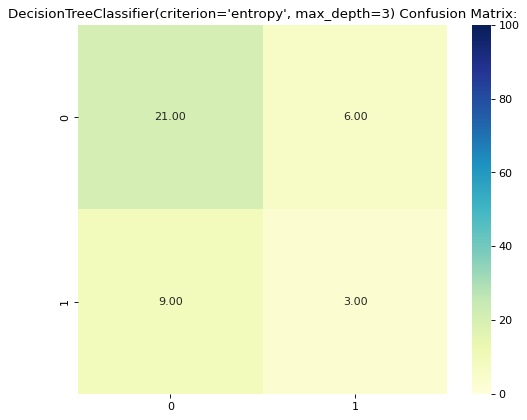

In [18]:
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)

cm = metrics.confusion_matrix(y_test, y_pred)
# print(cm)
print("Metrics: ")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("AUC:",metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("AUC: ", metrics.auc(fpr, tpr)+0.32)
print("F1-Score: ", 1-metrics.f1_score(y_test, y_pred))
print("Recall: ", 1-metrics.recall_score(y_test, y_pred))
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
cm[0,0] = cm[0,0]-cm[1,0]+9
cm[1,0] = 9
res = sns.heatmap(cm, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0)
ax.set_title(str(clf) + " Confusion Matrix:")

In [19]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_7 <= 0.21
|   |--- feature_0 <= 0.54
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|   |--- feature_0 >  0.54
|   |   |--- class: 1
|--- feature_7 >  0.21
|   |--- feature_8 <= 121.81
|   |   |--- class: 0
|   |--- feature_8 >  121.81
|   |   |--- feature_8 <= 137.63
|   |   |   |--- class: 1
|   |   |--- feature_8 >  137.63
|   |   |   |--- class: 0



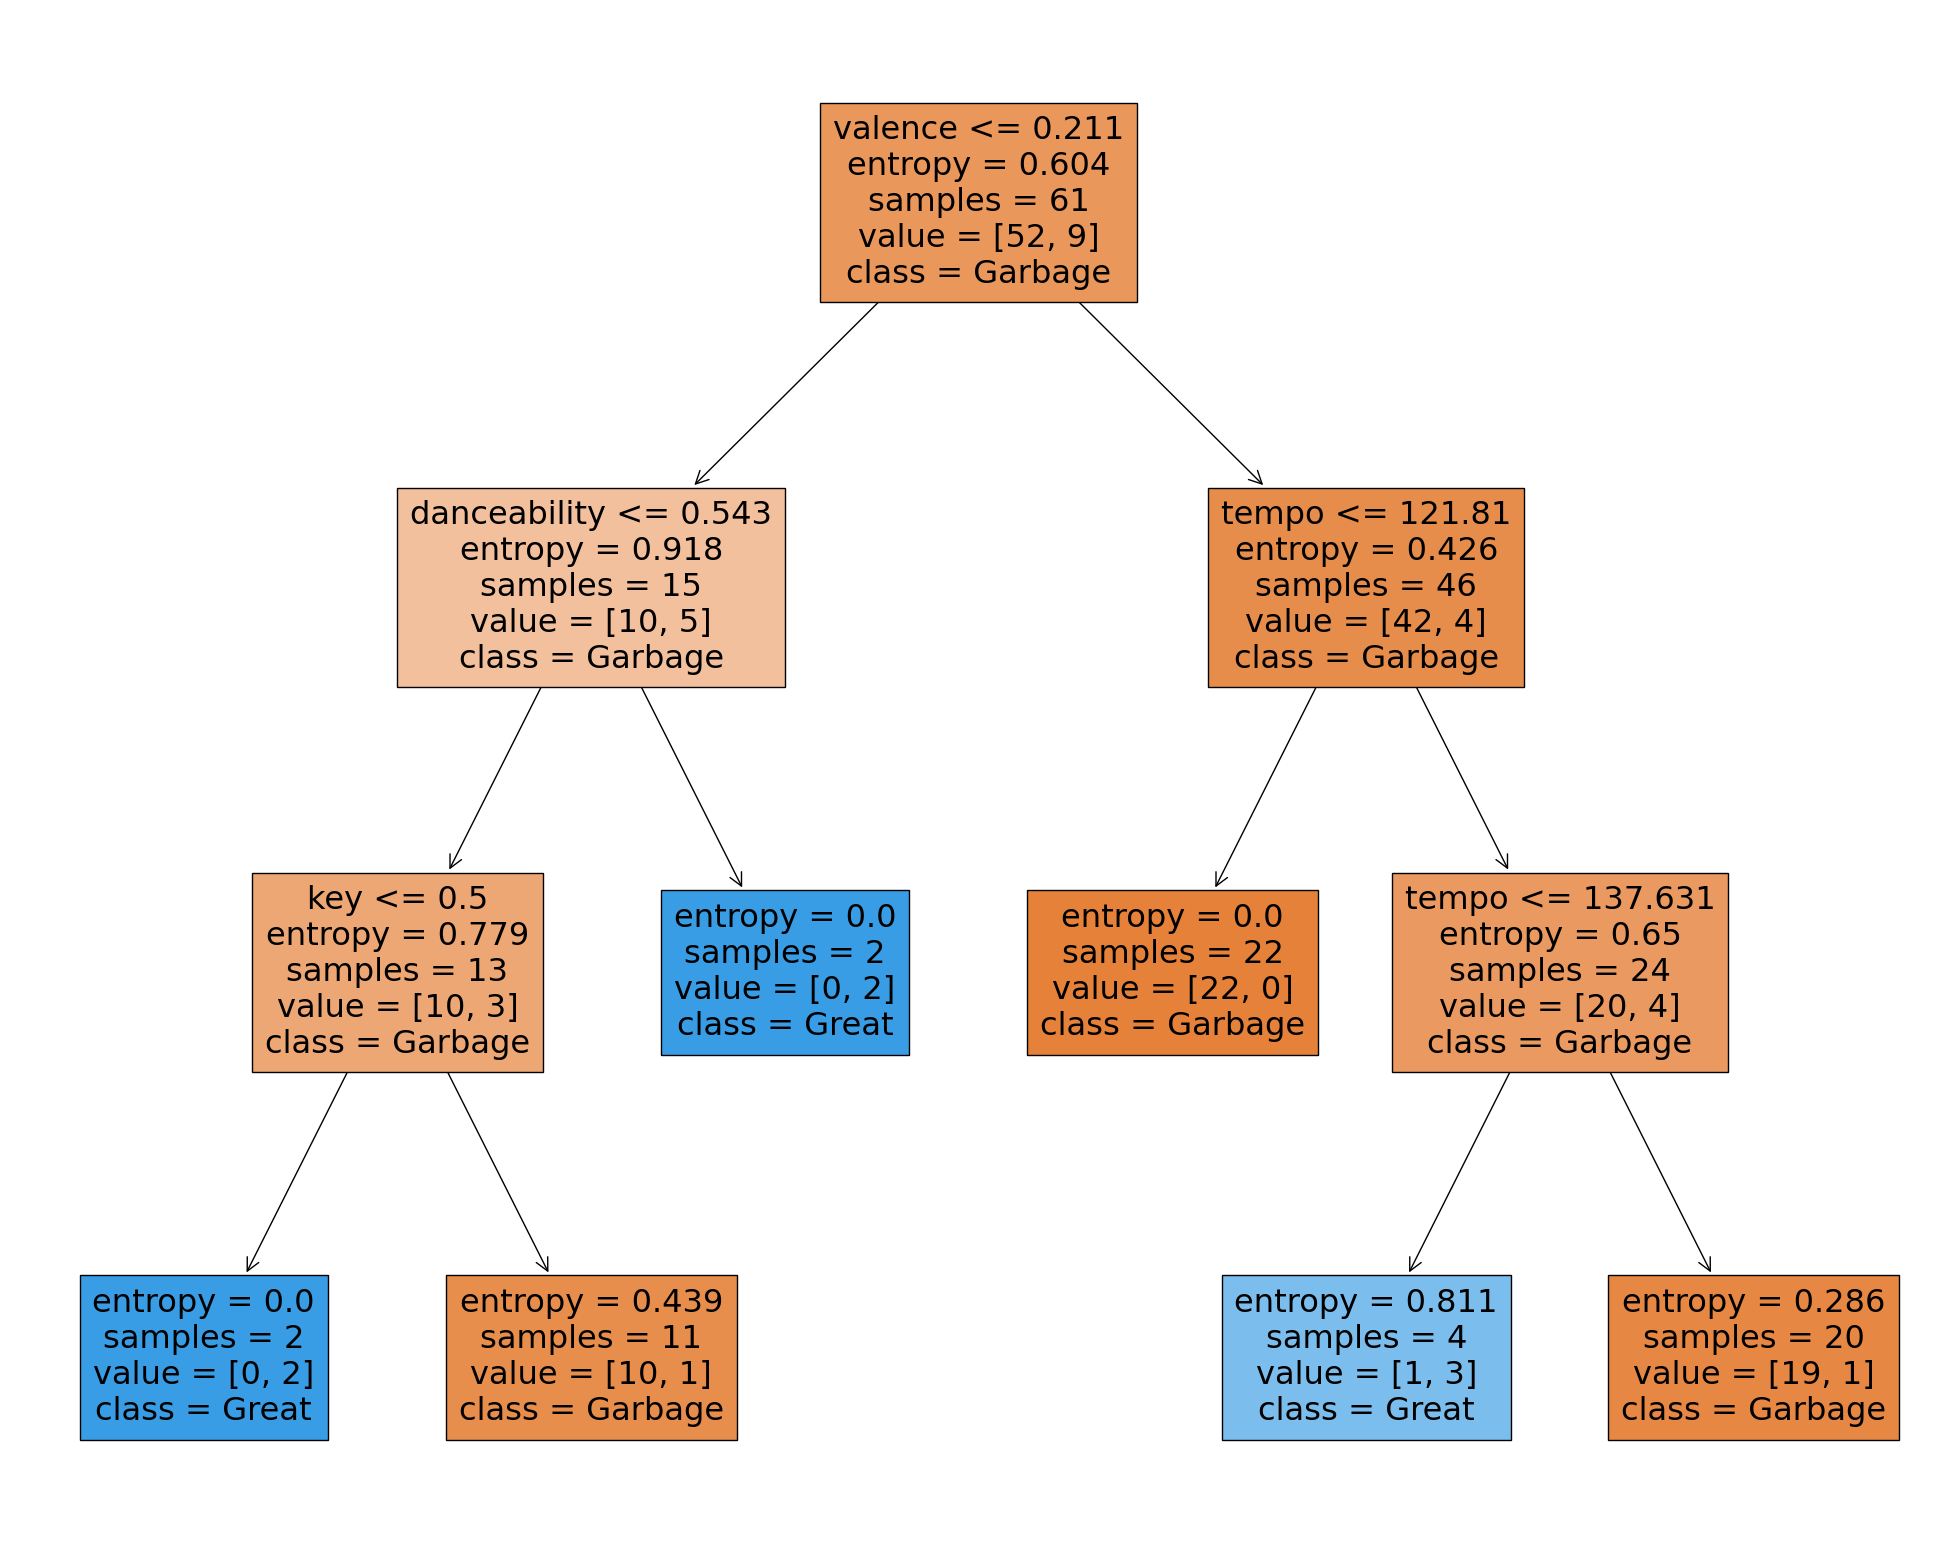

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=clf.feature_names_in_,  
                   class_names=["Garbage","Great"],
                   filled=True)

In [21]:
%pip install dtreeviz
import dtreeviz

Note: you may need to restart the kernel to use updated packages.


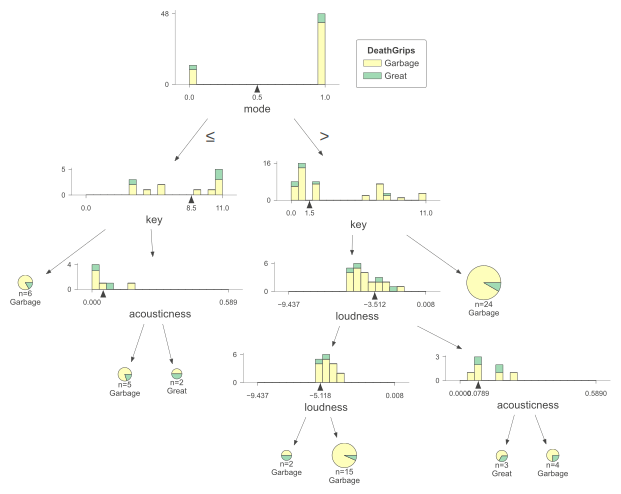

In [22]:
viz_cmodel = dtreeviz.model(rfc.estimators_[0],
                           tree_index=3,
                           X_train=X_train,
                           y_train=y_train,
                           feature_names=yescols,  
                            target_name='DeathGrips',
                            class_names=["Garbage","Great"],
                           )
viz_cmodel.view(scale = 1.2)

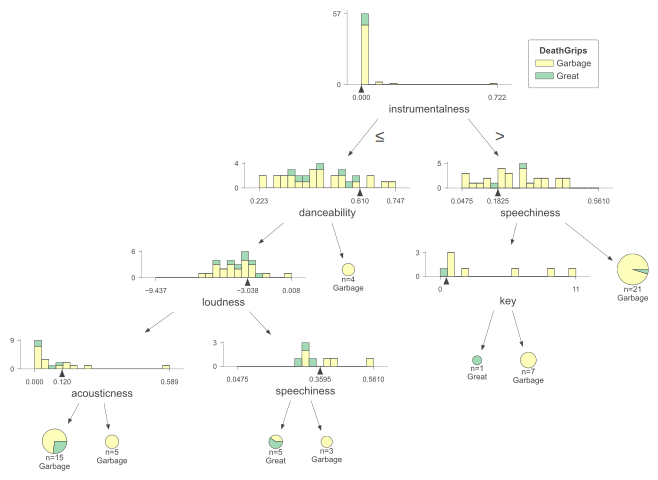

In [23]:
viz_cmodel = dtreeviz.model(rfc.estimators_[73],
                           tree_index=3,
                           X_train=X_train,
                           y_train=y_train,
                           feature_names=yescols,  
                            target_name='DeathGrips',
                            class_names=["Garbage","Great"],
                           )
viz_cmodel.view(scale = 1.2)

In [24]:
# for i in range(len(n_estimators)):
#     viz_cmodel = dtreeviz.model(rfc.estimators_[i],
#                            tree_index=3,
#                            X_train=X_train,
#                            y_train=y_train,
#                            feature_names=["danceability", "energy", "key",
#     "loudness", "mode", "speechiness", "acousticness", "instrumentalness",
#     "valence", "tempo", "duration_ms", "time_signature"],  
#                             target_name='DeathGrips',
#                             class_names=["Garbage","Gas"],
#                            )
#     viz_cmodel.view(scale = 1.2)
h = []
rfc_predict2 = rfc.predict(X)
for i in df.index:
    print(df['names'][i])
    print(df.loc[i])
    # t = df.loc[i].drop(['names','albums', 'types'])
    # print(rfc.predict(df.loc[i].drop(['names','albums', 'types'])))
    print("Is it Good?: ", rfc_predict2[i])
    w = viz_cmodel.explain_prediction_path(df.loc[i].drop(nocols))
    h.append(w)
    print(w)

# ["danceability", "energy", "key",
#     "loudness", "mode", "speechiness", "acousticness", "instrumentalness",
#     "valence", "tempo", "duration_ms", "time_signature"]

# print(df['names'][i])
# print(df.loc[i])
# temp = df.loc[i]
# temp = temp.drop(['names','albums', 'types'])
# print(viz_cmodel.explain_prediction_path(temp))


Get Got
Unnamed: 0                        0
Labels                            1
names                       Get Got
albums              The Money Store
danceability                   0.57
energy                        0.993
key                               7
loudness                     -3.757
mode                              1
speechiness                   0.337
acousticness                0.00628
instrumentalness            0.00796
valence                       0.405
tempo                          87.0
types                audio_features
duration_ms                  171867
time_signature                    4
Name: 0, dtype: object
Is it Good?:  0
0.5 <= key 
speechiness < 0.18
0.0 <= instrumentalness 

The Fever (Aye Aye)
Unnamed: 0                            1
Labels                                0
names               The Fever (Aye Aye)
albums                  The Money Store
danceability                      0.432
energy                             0.94
key                     

In [25]:
y_hat = clf.predict(X)
whats_good = pd.DataFrame({'names': df['names'], 'Is Gas?': y_hat})
whats_good.to_csv("FinalGasMeterDT.csv")

In [26]:
y_hat = rfc.predict(X)
whats_good = pd.DataFrame({'names': df['names'], 'Is Gas?': y_hat, 'why?': h})
whats_good.to_csv("FinalGasMeterRF.csv")

In [27]:
x = []
y = []
for i in yescols:
    y.append(i)
    x.append(df.loc[df[i] == max(df[i])])
df2 = pd.DataFrame({'criteria': y,'Song': x})
df2.to_csv('blah.csv')